In [ ]:
import os
import torch
import pydicom as pyd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

print('CUDA available:', torch.cuda.is_available())
torch.version.cuda
print(torch.__version__)


CUDA available: True


In [2]:
data_file_path = r"/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5"

In [3]:
def list_dicom_files(root_dir):
    dicoms = []
    for dp, _, fns in os.walk(root_dir):
        for fn in fns:
            p = os.path.join(dp, fn)
            dicoms.append(p)
    return dicoms

dicom_files_name_list =list_dicom_files(data_file_path)
print(dicom_files_name_list)

['/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/311.dcm', '/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/36.dcm', '/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/249.dcm', '/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/298.dcm', '/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/235.dcm', '/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/122.dcm', '/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/232.dcm', '/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/125.dcm', '/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/460.dcm', '/home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/316.dcm', '/home/m32

In [4]:
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(data_file_path)
reader.SetFileNames(dicom_names)
image = reader.Execute()

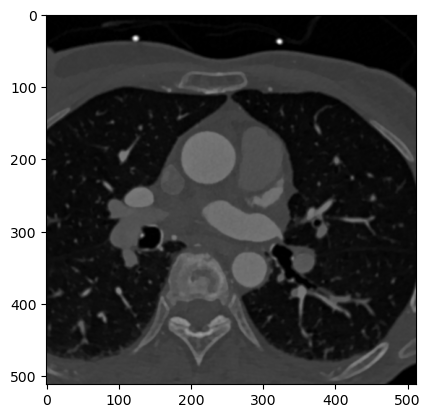

In [ ]:
# For transform dcm to nifti, we can use sitk.GetArrayFromImage to get the 3D array and then save it as nifti using sitk.WriteImage. However, since we want to crop the image in z dimension, we can directly use sitk.RegionOfInterest to crop the image and then save it as nifti.
#
# 

array = sitk.GetArrayFromImage(image)

size = image.GetSize()  # (x,y,z)

# (x_start, y_start, z_start)
start = [0, 0, 0]

# (x_size, y_size, z_size)
z_size = 460 # we want to keep all slices, so we set z_size to the original size in z dimension like size[2]
new_size = [size[0], size[1], 460]

cropped = sitk.RegionOfInterest(image, new_size, start)

sitk.WriteImage(cropped, data_file_path + "/converted_image.nii.gz")

plt.imshow(array[400], cmap='gray')
plt.show()

In [ ]:
# Now we have the nifti file, we can use the totalsegmentator to segment the heart chambers. We will use the "heartchambers_highres" task which is specifically designed for high resolution cardiac CT images. The output will be saved in the same directory as the input nifti file.
#
#

from totalsegmentator.python_api import totalsegmentator
if __name__ == "__main__":
    input_file = data_file_path + "/converted_image.nii.gz"
    output_file = data_file_path + "/segmentations"

    out_segmentation = totalsegmentator(
        input=input_file,
        output=output_file,
        fast=False, 
        preview = False,
        task="heartchambers_highres", 
        ml=True, 
        verbose=True
    )

    print(f"Solutions: {output_file}")

Using Device: cuda:0

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024



Downloading: 100%|██████████| 230M/230M [00:18<00:00, 12.1MB/s] 


Download finished. Extracting...
Generating rough segmentation for cropping...
  (Using more robust (but slower) 3mm model for cropping.)


Downloading: 100%|██████████| 135M/135M [00:01<00:00, 69.0MB/s] 


Download finished. Extracting...
tmp_dir: /tmp/nnunet_tmp_z6vtdb6s
Resampling...
  from shape (512, 512, 460) to shape (67, 67, 46)
  Resampled in 8.17s
Predicting...


/home/m320413/CT_Cardiac_Kayacan/processing/env/cardiac_ct_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting s01:
perform_everything_on_device: True


100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


sending off prediction to background worker for resampling and export
done with s01
  Predicted in 6.65s
Resampling...
  back to original shape: (512, 512, 460)
Undoing canonical...
Rough organ segmentation generated in 39.31s
tmp_dir: /tmp/nnunet_tmp_rent6t6d
  cropping from (512, 512, 460) to (434, 358, 449)
Predicting...
There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting s01:
perform_everything_on_device: True


100%|██████████| 8/8 [00:00<00:00,  9.39it/s]


sending off prediction to background worker for resampling and export
done with s01
  Predicted in 71.11s
Undoing canonical...
Undoing cropping...
Applying postprocessing: remove outside of crop mask...
  Applied in 4.13s
Saving segmentations...
  Saved in 2.20s
Solutions: /home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/segmentations


TypeError: Wrong number or type of arguments for overloaded function 'ImageFileWriter_Execute'.
  Possible C/C++ prototypes are:
    itk::simple::ImageFileWriter::Execute(itk::simple::Image const &)
    itk::simple::ImageFileWriter::Execute(itk::simple::Image const &,itk::simple::PathType const &,bool,int)


In [ ]:
from totalsegmentator.map_to_binary import class_map

class_map["heartchambers_highres"]

{1: 'heart_myocardium',
 2: 'heart_atrium_left',
 3: 'heart_ventricle_left',
 4: 'heart_atrium_right',
 5: 'heart_ventricle_right',
 6: 'aorta',
 7: 'pulmonary_artery'}

In [ ]:
# Now we have the segmentation result, we can do some post-processing to get the final segmentation mask. We will use binary erosion to remove the small isolated regions and then use k-means clustering to separate the different heart chambers. Finally, we will save the final segmentation mask as a nifti file.
# For 3D version of binary erosion, we can use skimage.morphology.binary_erosion with a 3D structuring element like ball. For k-means clustering, we can use sklearn.cluster.KMeans to cluster the voxels based on their intensity and spatial coordinates. We will also need to normalize the features before clustering. Finally, we will save the final segmentation mask as a nifti file using sitk.WriteImage.
#

from skimage.morphology import binary_erosion, disk, ball
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

erosion_on = 1
k_means_on = 1
segmentation_mask = 1

seg_sitk = sitk.ReadImage(output_file + ".nii")
ct_sitk = sitk.ReadImage(input_file)
ct_intensities = sitk.GetArrayFromImage(ct_sitk)

voxel_spacing = seg_sitk.GetSpacing()  # (x, y, z)
print("voxel spacing:", voxel_spacing)
origin = seg_sitk.GetOrigin()
direction = seg_sitk.GetDirection()
segmentation = sitk.GetArrayFromImage(seg_sitk)

r_mm = 2.0
r_voxx = max(1, int(round(r_mm / voxel_spacing[0])))
r_voxy = max(1, int(round(r_mm / voxel_spacing[1])))
r_voxz = max(1, int(round(r_mm / voxel_spacing[2])))

print(f"erosion radius in voxels: ({r_voxx}, {r_voxy}, {r_voxz})")

if segmentation_mask:
    segmentation_masked_organ = (segmentation > 0) & (segmentation < 2)  # bool mask
else:
    segmentation_masked_organ = segmentation > 0

if erosion_on:
    mask3d_eroded = binary_erosion(segmentation_masked_organ, footprint=ball(1))
else:
    mask3d_eroded = segmentation_masked_organ

ct_masked = np.where(mask3d_eroded, ct_intensities , 0)

if k_means_on:
    k = 10
    mask = mask3d_eroded.astype(bool)

    # --- features ---
    coords = np.argwhere(mask).astype(np.float32)      # (N,3)
    intens = ct_intensities[mask].reshape(-1, 1).astype(np.float32)  # (N,1)

    # normalize
    coords = (coords - coords.mean(0, keepdims=True)) / (coords.std(0, keepdims=True) + 1e-8)
    intens = (intens - intens.mean(0, keepdims=True)) / (intens.std(0, keepdims=True) + 1e-8)

    # combine features
    X = np.hstack([intens, 2.0*coords])

    # --- kmeans ---
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=0)
    labels = kmeans.fit_predict(X)     # 0..k-1

    clustered = np.zeros(mask.shape, dtype=np.uint16)
    clustered[mask] = labels + 1       # 1..k

    mask3d_eroded = clustered

else:
    mask3d_eroded = mask3d_eroded

warped_sitk = sitk.GetImageFromArray(mask3d_eroded.astype(np.uint16))
warped_sitk.SetSpacing(voxel_spacing)
warped_sitk.SetOrigin(origin)
warped_sitk.SetDirection(direction)
orienter = sitk.DICOMOrientImageFilter()
orienter.SetDesiredCoordinateOrientation('RAS')
warped_sitk = orienter.Execute(warped_sitk)
sitk.WriteImage(warped_sitk, data_file_path + "/erosioned_img.nii.gz")
print("image saved!")


voxel spacing: (0.390625, 0.390625, 0.30000001192092896)
erosion radius in voxels: (5, 5, 7)


/tmp/ipykernel_44145/3578984064.py:35: FutureWarning: `binary_erosion` is deprecated since version 0.26 and will be removed in version 0.28. Use `skimage.morphology.erosion` instead. Note the pixel shift by 1 for even-sized footprints (see docstring notes).
  mask3d_eroded = binary_erosion(segmentation_masked_organ, footprint=ball(1))


image saved!


In [47]:
from skimage.morphology import binary_erosion, disk
import numpy as np
import SimpleITK as sitk
from sklearn.cluster import KMeans

# switches
erosion_on = 1
k_means_on = 1
segmentation_mask = 1  # True ise (0<seg<6) gibi ROI, False ise seg>0

# read
seg_sitk = sitk.ReadImage(output_file + ".nii")
ct_sitk  = sitk.ReadImage(input_file)

seg = sitk.GetArrayFromImage(seg_sitk)       # (z,y,x)
ct  = sitk.GetArrayFromImage(ct_sitk)        # (z,y,x)

spacing = seg_sitk.GetSpacing()              # (x,y,z)
origin  = seg_sitk.GetOrigin()
direction = seg_sitk.GetDirection()

# --- ROI mask (bool) ---
if segmentation_mask:
    roi = (seg > 0) & (seg < 2)
else:
    roi = (seg > 0)

# --- 2D erosion slice-wise ---
mask_eroded = roi.copy()

if erosion_on:
    r_mm = 0.5
    repeat_alg = 2

    r_vox_x = int(round(r_mm / spacing[0]))
    r_vox_y = int(round(r_mm / spacing[1]))
    r_vox = max(1, int(round((r_vox_x + r_vox_y) / 2)))

    selem = disk(r_vox)

    mask_eroded = np.zeros_like(roi, dtype=bool)

    for z in range(roi.shape[0]):
        temp_field = roi[z]        
        for _ in range(repeat_alg):
             temp_field = binary_erosion(temp_field, footprint=selem)

        mask_eroded[z] = temp_field

# --- apply mask to CT (opsiyonel) ---
ct_masked = np.where(mask_eroded, ct, 0)

# --- 2D k-means slice-wise ---
if k_means_on:
    k = 3
    clustered = np.zeros_like(seg, dtype=np.uint16)  # (z,y,x)

    for z in range(mask_eroded.shape[0]):
        m = mask_eroded[z]
        if m.sum() < k:   # çok az piksel varsa atla
            continue

        coords = np.argwhere(m).astype(np.float32)        # (N,2) -> (y,x)
        intens = ct[z][m].reshape(-1, 1).astype(np.float32)

        # normalize
        coords = (coords - coords.mean(0, keepdims=True)) / (coords.std(0, keepdims=True) + 1e-8)
        intens = (intens - intens.mean(0, keepdims=True)) / (intens.std(0, keepdims=True) + 1e-8)

        # feature combine (ağırlık ayarı)
        X = np.hstack([intens, 2.0 * coords])  # (N, 1+2)

        kmeans = KMeans(n_clusters=k, n_init="auto", random_state=0)
        lab = kmeans.fit_predict(X)  # 0..k-1

        clustered[z][m] = (lab + 1).astype(np.uint16)  # 1..k

    out_arr = clustered
else:
    out_arr = mask_eroded.astype(np.uint16)

# --- write output ---
out_sitk = sitk.GetImageFromArray(out_arr)   # array (z,y,x)
out_sitk.SetSpacing(spacing)
out_sitk.SetOrigin(origin)
out_sitk.SetDirection(direction)

orienter = sitk.DICOMOrientImageFilter()
orienter.SetDesiredCoordinateOrientation('RAS')
out_sitk = orienter.Execute(out_sitk)

sitk.WriteImage(out_sitk, data_file_path + "/postproc_2d.nii.gz")
print("saved:", data_file_path + "/postproc_2d.nii.gz")

/tmp/ipykernel_44145/1086061942.py:46: FutureWarning: `binary_erosion` is deprecated since version 0.26 and will be removed in version 0.28. Use `skimage.morphology.erosion` instead. Note the pixel shift by 1 for even-sized footprints (see docstring notes).
  temp_field = binary_erosion(temp_field, footprint=selem)


saved: /home/m320413/CT_Cardiac_Kayacan/CTA(FFR)--340-942720716747264/cta cor  bestsyst 36 %-5/postproc_2d.nii.gz


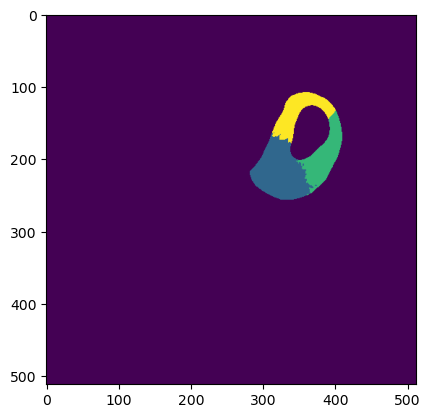

In [49]:
plt.imshow(out_arr[130,:,:])

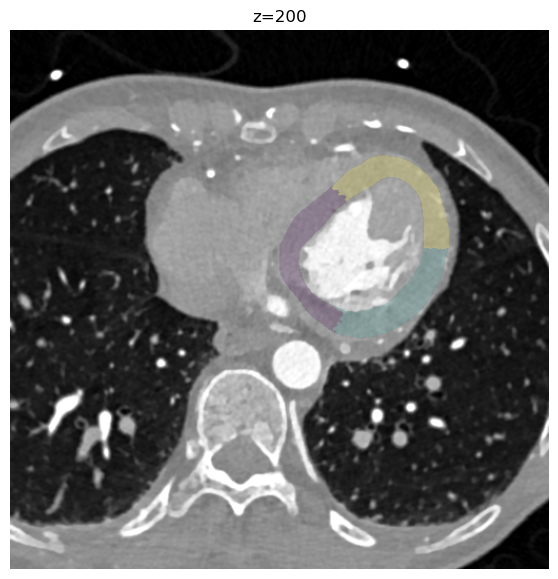

In [82]:
# --- utils for visualization ---
#
#

def resample_to_ref(moving, ref, is_label=True):
    """moving'i ref grid'ine resample eder."""
    interp = sitk.sitkNearestNeighbor if is_label else sitk.sitkLinear
    return sitk.Resample(
        moving,                  # moving image
        ref,                     # reference image
        sitk.Transform(),        # identity transform
        interp,
        0,                       # default pixel value
        moving.GetPixelID()      # output pixel type
    )

def show_overlay(img_path, seg_path, z=None, alpha=0.35, contour=True):
    img = sitk.ReadImage(img_path)
    seg = sitk.ReadImage(seg_path)

    # Grid uyumu kontrol (spacing/size/direction/origin farklıysa resample)
    same_grid = (img.GetSize() == seg.GetSize() and
                 img.GetSpacing() == seg.GetSpacing() and
                 img.GetOrigin() == seg.GetOrigin() and
                 img.GetDirection() == seg.GetDirection())
    if not same_grid:
        seg = resample_to_ref(seg, img, is_label=True)

    img_arr = sitk.GetArrayFromImage(img).astype(np.float32)   # (z,y,x)
    seg_arr = sitk.GetArrayFromImage(seg)                      # (z,y,x)

    # Slice seç
    if z is None:
        # otomatik: segmentin en çok olduğu slice
        counts = (seg_arr > 0).sum(axis=(1,2))
        z = int(np.argmax(counts)) if counts.max() > 0 else img_arr.shape[0]//2

    I = img_arr[z]
    S = seg_arr[z]

    # Normalizasyon (görüntü daha iyi görünsün)
    vmin, vmax = np.percentile(I, (1, 99))
    I_show = np.clip(I, vmin, vmax)

    plt.figure(figsize=(7,7))
    plt.imshow(I_show, cmap="gray")
    plt.title(f"z={z}")

    # 1) Alpha overlay
    mask = (S > 0)
    overlay = np.zeros((*S.shape, 4), dtype=np.float32)
    overlay[mask] = [1.0, 0.0, 0.0, alpha]   # kırmızı, yarı şeffaf
    plt.imshow(overlay)

    # 2) Contour (opsiyonel)
    if contour:
        plt.contour(mask.astype(np.uint8), levels=[0.5], linewidths=1)

    plt.axis("off")
    plt.show()

def show_label_overlay(img_path, seg_path, z=None, alpha=0.45):
    img = sitk.ReadImage(img_path)
    seg = sitk.ReadImage(seg_path)

    if (img.GetSize(), img.GetSpacing(), img.GetOrigin(), img.GetDirection()) != \
       (seg.GetSize(), seg.GetSpacing(), seg.GetOrigin(), seg.GetDirection()):
        seg = resample_to_ref(seg, img, is_label=True)

    img_arr = sitk.GetArrayFromImage(img).astype(np.float32)
    seg_arr = sitk.GetArrayFromImage(seg).astype(np.int32)

    if z is None:
        counts = (seg_arr > 0).sum(axis=(1,2))
        z = int(np.argmax(counts)) if counts.max() > 0 else img_arr.shape[0]//2

    I = img_arr[z]
    L = seg_arr[z]

    vmin, vmax = np.percentile(I, (1, 99))
    I_show = np.clip(I, vmin, vmax)

    plt.figure(figsize=(7,7))
    plt.imshow(I_show, cmap="gray")

    # label'ları renkli bas (matplotlib otomatik colormap)
    masked = np.ma.masked_where(L == 0, L)
    plt.imshow(masked, alpha=alpha)  # renkleri default colormap ile verir

    plt.title(f"z={z}")
    plt.axis("off")
    plt.show()

show_label_overlay(input_file, data_file_path + "/postproc_2d.nii.gz", z=200, alpha=0.2)

In [26]:

print(np.unique(mask3d_eroded))

print([f"{i}: {class_map['heartchambers_highres'][i]}" for i in np.unique(mask3d_eroded) if int(i) in class_map["heartchambers_highres"]])

[False  True]
['True: heart_myocardium']
